Nama : Vanda Sekar Annisa

NIM  : 10320047

PRAKTIKUM 4 STATAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Membaca data yang ingin diolah
data = pd.read_csv('gaiadr2')
data

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,p2_o_error,p3_o,p3_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,metallicity,metallicity_error,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,type_best_classification,type2_best_sub_classification,mode_best_classification,multi_mode_best_classification
0,1635721458409799680,Gaia DR2 4052922352453886976,4052922352453886976,342001839,2015.5,275.945268,0.032038,-25.672356,0.031882,0.029784,0.037076,0.803320,-0.321959,0.059354,-2.194284,0.050872,0.380963,-0.153004,-0.316630,-0.365545,-0.466615,-0.154545,-0.512562,-0.287273,0.237530,0.208831,167,0,167,0,-3.256800,109.649730,0.000000,0.000000e+00,31,False,37.962510,1.430995,0.007529,0.119569,...,NaN,NaN,NaN,1637.063272,1.172669e-03,1637.131058,1.172669e-03,1638.690951,1.172669e-03,14.559613,0.000121,15.422571,0.003206,13.630170,0.003486,1.114401,0.000720,1.230174,0.009329,1.063297,0.019923,NaN,NaN,0.293466,0.000549,NaN,NaN,6.049081,0.001478,NaN,NaN,19,15,14,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
1,1635721458409799680,Gaia DR2 4103564728516764032,4103564728516764032,1160524652,2015.5,280.454570,0.028045,-14.505427,0.029704,0.079756,0.038581,2.067211,-0.922074,0.053515,-7.509549,0.049285,0.198843,-0.152182,-0.138623,-0.286729,-0.508142,-0.014397,-0.344146,-0.378649,0.256550,0.174833,149,0,146,3,-3.675161,87.364740,0.000000,0.000000e+00,31,False,67.759030,1.442606,0.008568,0.078084,...,NaN,NaN,NaN,1657.088226,2.883470e-04,1657.768692,2.883470e-04,1660.671355,2.883470e-04,13.647923,0.002157,14.575795,0.003055,12.940319,0.001979,1.347353,0.007033,1.164725,0.018491,0.536033,0.005193,NaN,NaN,0.194161,0.002256,NaN,NaN,4.201451,0.004610,NaN,NaN,17,15,13,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
2,1635721458409799680,Gaia DR2 4102332175955773568,4102332175955773568,869040531,2015.5,284.202140,0.057778,-13.622576,0.052404,0.179978,0.061577,2.922835,-2.202965,0.115694,-7.458829,0.105958,0.231799,0.017678,-0.225765,-0.298537,-0.168791,-0.253010,-0.332470,-0.240824,0.140849,0.302903,161,0,159,2,1.768571,186.411990,0.175794,1.326468e+00,31,False,5.274775,1.543384,0.015644,0.157823,...,NaN,NaN,NaN,1692.322591,4.805855e-04,1692.728788,4.805855e-04,1692.327008,4.805855e-04,16.260889,0.000530,16.816808,0.018745,15.518061,0.010214,0.799869,0.001706,0.935397,0.046064,0.579696,0.025605,NaN,NaN,0.159987,0.001764,NaN,NaN,4.217878,0.013554,NaN,NaN,18,16,18,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
3,1635721458409799680,Gaia DR2 4103813802261866496,4103813802261866496,1191040834,2015.5,280.344007,0.048019,-13.841397,0.046555,0.608229,0.058904,10.325749,-0.217175,0.122697,0.802277,0.101122,0.247041,-0.080399,-0.288933,-0.185629,-0.426449,-0.335971,-0.123799,0.339084,-0.355218,-0.300146,142,142,139,3,-0.653731,122.949776,0.000000,0.000000e+00,31,True,300.662350,1.517687,0.011735,0.109409,...,NaN,NaN,NaN,1705.364132,7.896107e-05,1705.357556,7.896107e-05,1705.532164,7.896107e-05,9.721283,0.000280,10.297049,0.000359,9.025764,0.000337,0.346718,0.000974,0.275710,0.002084,0.360065,0.001108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
# Mengklasifikasikan data
data = data[(data['type_best_classification'] == "DCEP") & (data['mode_best_classification'] == "FUNDAMENTAL")]
data

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,p2_o_error,p3_o,p3_o_error,epoch_g,epoch_g_error,epoch_bp,epoch_bp_error,epoch_rp,epoch_rp_error,int_average_g,int_average_g_error,int_average_bp,int_average_bp_error,int_average_rp,int_average_rp_error,peak_to_peak_g,peak_to_peak_g_error,peak_to_peak_bp,peak_to_peak_bp_error,peak_to_peak_rp,peak_to_peak_rp_error,metallicity,metallicity_error,r21_g,r21_g_error,r31_g,r31_g_error,phi21_g,phi21_g_error,phi31_g,phi31_g_error,num_clean_epochs_g,num_clean_epochs_bp,num_clean_epochs_rp,g_absorption,g_absorption_error,type_best_classification,type2_best_sub_classification,mode_best_classification,multi_mode_best_classification
0,1635721458409799680,Gaia DR2 4052922352453886976,4052922352453886976,342001839,2015.5,275.945268,0.032038,-25.672356,0.031882,0.029784,0.037076,0.803320,-0.321959,0.059354,-2.194284,0.050872,0.380963,-0.153004,-0.316630,-0.365545,-0.466615,-0.154545,-0.512562,-0.287273,0.237530,0.208831,167,0,167,0,-3.256800,109.649730,0.000000,0.000000e+00,31,False,37.962510,1.430995,0.007529,0.119569,...,NaN,NaN,NaN,1637.063272,0.001173,1637.131058,0.001173,1638.690951,0.001173,14.559613,0.000121,15.422571,0.003206,13.630170,0.003486,1.114401,0.000720,1.230174,0.009329,1.063297,0.019923,NaN,NaN,0.293466,0.000549,NaN,NaN,6.049081,0.001478,NaN,NaN,19,15,14,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
1,1635721458409799680,Gaia DR2 4103564728516764032,4103564728516764032,1160524652,2015.5,280.454570,0.028045,-14.505427,0.029704,0.079756,0.038581,2.067211,-0.922074,0.053515,-7.509549,0.049285,0.198843,-0.152182,-0.138623,-0.286729,-0.508142,-0.014397,-0.344146,-0.378649,0.256550,0.174833,149,0,146,3,-3.675161,87.364740,0.000000,0.000000e+00,31,False,67.759030,1.442606,0.008568,0.078084,...,NaN,NaN,NaN,1657.088226,0.000288,1657.768692,0.000288,1660.671355,0.000288,13.647923,0.002157,14.575795,0.003055,12.940319,0.001979,1.347353,0.007033,1.164725,0.018491,0.536033,0.005193,NaN,NaN,0.194161,0.002256,NaN,NaN,4.201451,0.004610,NaN,NaN,17,15,13,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
2,1635721458409799680,Gaia DR2 4102332175955773568,4102332175955773568,869040531,2015.5,284.202140,0.057778,-13.622576,0.052404,0.179978,0.061577,2.922835,-2.202965,0.115694,-7.458829,0.105958,0.231799,0.017678,-0.225765,-0.298537,-0.168791,-0.253010,-0.332470,-0.240824,0.140849,0.302903,161,0,159,2,1.768571,186.411990,0.175794,1.326468e+00,31,False,5.274775,1.543384,0.015644,0.157823,...,NaN,NaN,NaN,1692.322591,0.000481,1692.728788,0.000481,1692.327008,0.000481,16.260889,0.000530,16.816808,0.018745,15.518061,0.010214,0.799869,0.001706,0.935397,0.046064,0.579696,0.025605,NaN,NaN,0.159987,0.001764,NaN,NaN,4.217878,0.013554,NaN,NaN,18,16,18,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN
3,1635721458409799680,Gaia DR2 4103813802261866496,4103813802261866496,1191040834,2015.5,280.344007,0.048019,-13.841397,0.046555,0.608229,0.058904,10.325749,-0.217175,0.122697,0.802277,0.101122,0.247041,-0.080399,-0.288933,-0.185629,-0.426449,-0.335971,-0.123799,0.339084,-0.355218,-0.300146,142,142,139,3,-0.653731,122.949776,0.000000,0.000000e+00,31,True,300.662350,1.517687,0.011735,0.109409,...,NaN,NaN,NaN,1705.364132,0.000079,1705.357556,0.000079,1705.532164,0.000079,9.721283,0.000280,10.297049,0.000359,9.025764,0.000337,0.346718,0.000974,0.275710,0.002084,0.360065,0.001108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13,NaN,NaN,DCEP,NaN,FUNDAMENTAL,NaN


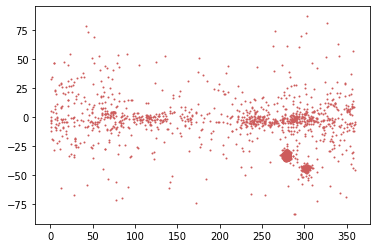

In [ ]:
# Plot dari data
plt.scatter(data.l, data.b, s=1, c='indianred')
plt.show()

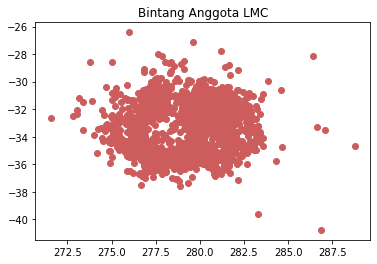

In [ ]:
# Menyeleksi bintang anggota LMC dan membuat plotnya
LMC = data[(data['b'] < -25) & (data['b'] > -50) & (data['l'] > 270) & (data['l'] < 290)]
plt.scatter(LMC.l, LMC.b, c='indianred')
plt.title('Bintang Anggota LMC')
plt.show()

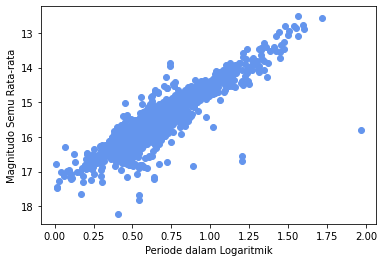

In [ ]:
# Plot periode (dalam logaritmik) terhadap magnitudo semu rata-rata
plt.scatter(np.log10(LMC.pf), LMC.int_average_g, c='cornflowerblue')
plt.gca().invert_yaxis()                                            # Mengubah sumbu y dari nilai besar ke kecil
plt.xlabel('Periode dalam Logaritmik')
plt.ylabel('Magnitudo Semu Rata-rata')
plt.show()

In [ ]:
# Menentukan parameter untuk mencari nilai alpha dan beta
x = np.log10(LMC.pf).to_numpy()           # x sebagai nilai logaritmik periode untuk LMC
y = LMC.int_average_g.to_numpy()          # y sebagai nilai magnitudo semu rata-rata untuk LMC
sgm = LMC.int_average_g_error.to_numpy()  # sgm sebagai nilai error dari magnitudo semu rata-rata untuk LMC

# Menginisiasi masing-masing suku sebesar 0
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0

for i in range(len(x)):                   # Memasukkan jumlah data kedalam list dari kelima suku
  s1 += 1/(sgm[i]**2)
  s2 += (x[i]**2)/(sgm[i]**2)
  s3 += y[i]/(sgm[i]**2)
  s4 += x[i]/(sgm[i]**2)
  s5 += (x[i]*y[i])/(sgm[i]**2)


n = (s1*s2) - (s4**2)                     # Mensubstitusikan kelima suku yang dibuat ke rumus parameter
a = ((s2*s3) - (s4*s5))/n
b = ((s1*s5) - (s4*s3))/n

print('a =', a)
print('b =', b)

a = 17.213207755664666
b = -2.708221752736651


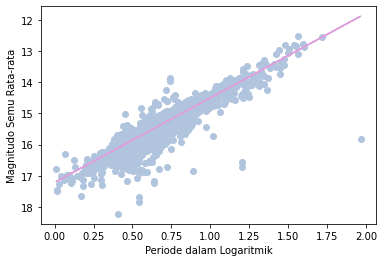

In [ ]:
# Plot dengan garis hasil regresi yang dilakukan
y_pred = b*x + a                          # Persamaan umum dari persamaan garis lurus (linier)

plt.scatter(x, y, c='lightsteelblue')
plt.plot(x, y_pred, c='plum')
plt.xlabel('Periode dalam Logaritmik')
plt.ylabel('Magnitudo Semu Rata-rata')
plt.gca().invert_yaxis()                  # Mengubah sumbu y dari nilai besar ke kecil
plt.show()

In [ ]:
# Menentukan estimasi galat parameter dari nilai alpha dan beta
err_a = s2/n                          # Mencari galat untuk nilai alpha
err_b = s1/n                          # Mencari galat untuk nilai beta

print('Galat a =', err_a)
print('Galat b =', err_b)

Galat a = 1.3088312386493848e-10
Galat b = 2.3978673144737765e-10


**Membandingkan hasil yang didapat dengan referensi**


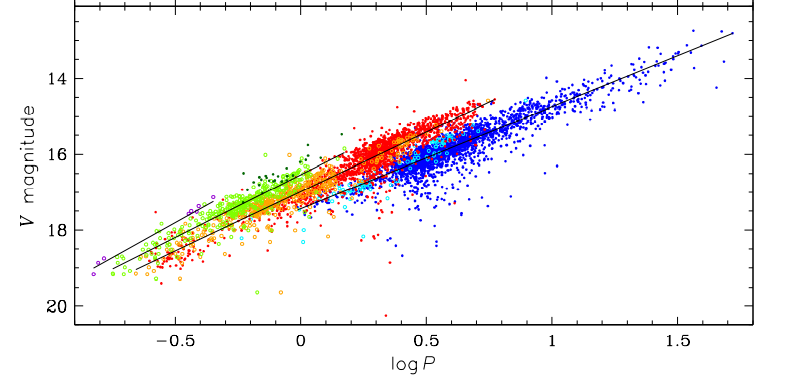

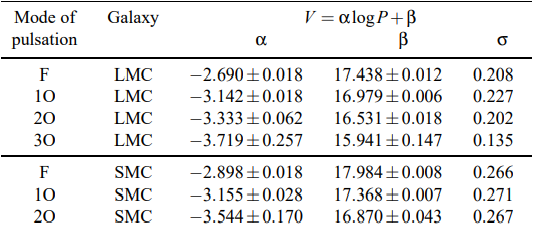

Dari data referensi yang didapat dari website https://arxiv.org/pdf/1601.01318.pdf dapat disimpulkan bahwa nilai alpha dan beta yang didapat dari data yang diolah mendekati nilai referensi, yaitu dari referensi tersebut mengasumsikan rumusnya v = alog(P)+b yang berarti a referensi sama dengan b dan b referensi sama dengan a dari data yang diolah tersebut, sebesar -2.69 dan 17.438. Dan dari data yg diolah nilai alpha sebesar 17.213 dan bet sebesar -2.708. Artinya metode regresi linear dengan chi squared fitting ini efektif digunakan untuk mendapat nilai yang sesuai.






